<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/retinaNet/retinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# start

In [33]:
# installs
!pip install retinaface_pytorch &> /dev/null

In [34]:
# imports
import os
import random
import cv2 
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
from google.colab.patches import cv2_imshow
import glob
import itertools

In [35]:
# loading dataset -- this might take a while to run for the first time, around 2min
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset

!gdown --id 1mNZ5eaoT9A0LdXLFZcE4lFeM9X6X7Cjt #loading the dataset from google drive link to colab
!unzip /content/rwmfd.zip &> /dev/null #unzipping
!rm -rf /content/rwmfd.zip &> /dev/null #deleting the zip file
!rm -rf __MACOSX &> /dev/null

Downloading...
From: https://drive.google.com/uc?id=1mNZ5eaoT9A0LdXLFZcE4lFeM9X6X7Cjt
To: /content/rwmfd.zip
157MB [00:00, 235MB/s]


In [36]:
# pre processing the dataset
# https://stackoverflow.com/questions/18394147/recursive-sub-folder-search-and-return-files-in-a-list-python
# https://stackoverflow.com/questions/11574195/how-to-merge-multiple-lists-into-one-list-in-python

def generate_image_paths(dir_path):
  files_jpg = glob.glob(dir_path + '/**/*.jpg', recursive=True)
  files_jpeg = glob.glob(dir_path + '/**/*.jpeg', recursive=True)
  files_png = glob.glob(dir_path + '/**/*.png', recursive=True)
  files_webp = glob.glob(dir_path + '/**/*.webp', recursive=True)
  files_jfif = glob.glob(dir_path + '/**/*.jfif', recursive=True)
  paths = list(itertools.chain(files_jpg, files_jpeg, files_png, files_webp, files_jfif))
  return paths

dataset_path = "/content/rwmfd"
paths = generate_image_paths(dataset_path)

print(len(paths))

4194


In [37]:
# retinaNet model, retinaFace for Face Detection
# https://pypi.org/project/retinaface-pytorch/

def retinaFace_detector(image_path, detector):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #detector accepts only RGB images
  faces = detector.predict_jsons(image)
  return faces

In [38]:
# openCV image cropping function
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

def openCV_image_cropping(image_path, face):
  img = cv2.imread(image_path)
  crop_img = img[face[1]:face[3], face[0]:face[2]]
  return crop_img

/usr/local/lib/python3.7/dist-packages/torch/hub.py:483: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


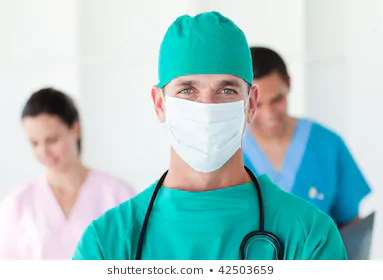

[{'bbox': [161, 60, 249, 164], 'score': 0.9998737573623657, 'landmarks': [[186, 90], [227, 91], [206, 115], [189, 135], [220, 135]]}, {'bbox': [24, 117, 71, 173], 'score': 0.9991106390953064, 'landmarks': [[33, 142], [52, 140], [42, 154], [41, 160], [55, 158]]}, {'bbox': [249, 74, 288, 135], 'score': 0.994142472743988, 'landmarks': [[259, 105], [276, 99], [270, 115], [266, 123], [280, 119]]}]


In [59]:
# passing random image from the dataset through retinaNet Face Detection model and visualising the output

detector = get_model("resnet50_2020-07-20", max_size=1024) #value of max_size ?? predition time depends on this
detector.eval()


random_image_path = random.choice(paths)
random_image = cv2.imread(random_image_path)
cv2_imshow(random_image)
faces = retinaFace_detector(random_image_path, detector)
print(faces)

{'bbox': [161, 60, 249, 164], 'score': 0.9998737573623657, 'landmarks': [[186, 90], [227, 91], [206, 115], [189, 135], [220, 135]]}


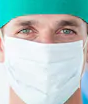

{'bbox': [24, 117, 71, 173], 'score': 0.9991106390953064, 'landmarks': [[33, 142], [52, 140], [42, 154], [41, 160], [55, 158]]}


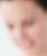

{'bbox': [249, 74, 288, 135], 'score': 0.994142472743988, 'landmarks': [[259, 105], [276, 99], [270, 115], [266, 123], [280, 119]]}


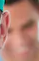

In [60]:
# passing random image face detection output of retinaNet Face Detection model to openCV image cropping function and visualising the image
for face in faces:
  print(face)
  if face != [] and face["score"] > 0.95:
    cropped_face = openCV_image_cropping(random_image_path, face["bbox"])
    cv2_imshow(cropped_face)

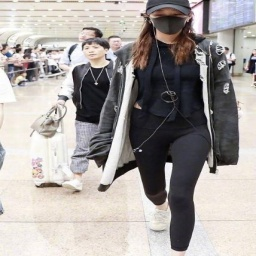

[149, 2, 184, 37]


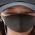

[84, 41, 102, 59]


[110, 37, 120, 48]


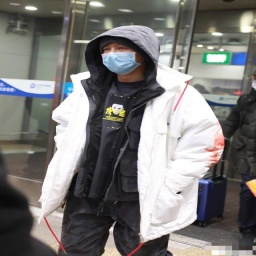

[101, 35, 140, 76]


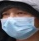

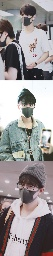

[17, 173, 39, 201]


[19, 100, 34, 118]


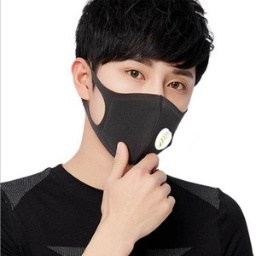

[90, 33, 194, 157]


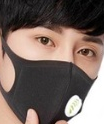

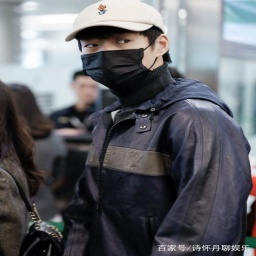

[81, 15, 152, 93]


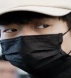

[75, 76, 97, 103]


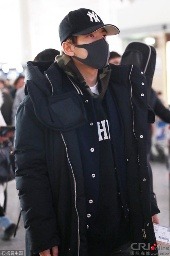

[74, 22, 109, 64]


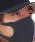

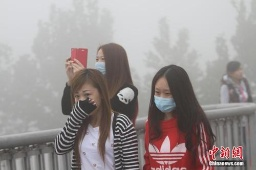

[72, 83, 100, 114]


[154, 77, 177, 112]


[95, 49, 110, 72]


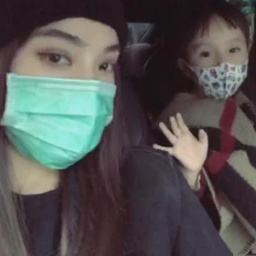

[185, 16, 248, 97]


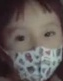

[4, 9, 121, 153]


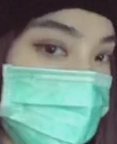

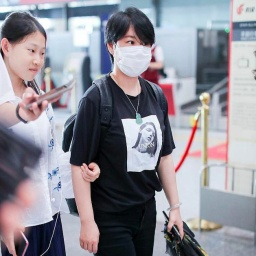

[10, 32, 46, 79]


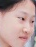

[114, 25, 149, 76]


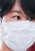

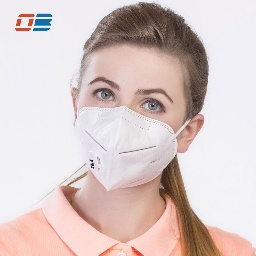

[77, 41, 183, 179]


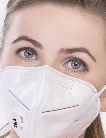

10

In [61]:
# passing some images from the dataset through retinaNet Face Detection model and openCV image cropping function (no visualisation)
detected_faces = {}

random.shuffle(paths)

# size set to 10 random images, make sure to change this while working on problem statement
# detecting - this might take a while
for image_path in paths[:10]:
  faces = retinaFace_detector(image_path, detector)
  for face in faces:
    if face != [] and face["score"] > 0.95:
      detected_faces.setdefault(image_path, []).append((face["bbox"]))

# displaying
for (image_path, faces) in detected_faces.items():
  cv2_imshow(cv2.imread(image_path))
  for face in faces:
    print(face)
    if face != []:
      cropped_face = openCV_image_cropping(image_path, face)
      cv2_imshow(cropped_face)

len(detected_faces)